In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
#Пути к директориям и файлам

# input
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors_clas/train.csv'

# output
PREP_DATASET_PATH_TRAIN = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors_clas/Macerszmidt_2_clas.csv'


In [136]:
#Загрузка данных
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()


,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [137]:
feature_names = [
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification'
 ]

target_name = 'mean_exam_points'

In [138]:
df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points',
 'choose']

In [139]:
df = df[feature_names + [target_name]]
df.head()

,age,years_of_experience,lesson_price,qualification,mean_exam_points
0,35.0,0.0,2150.0,2.0,74.0
1,52.0,2.0,1250.0,2.0,57.0
2,29.0,3.0,1750.0,1.0,66.0
3,33.0,3.0,1050.0,1.0,66.0
4,46.0,3.0,2250.0,2.0,73.0


In [140]:
X = df[feature_names]
y = df[target_name]

In [141]:
X = np.array(X)
y = np.array(y)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((7500, 4), (2500, 4))

In [143]:
from matplotlib.colors import ListedColormap

## bez PCA

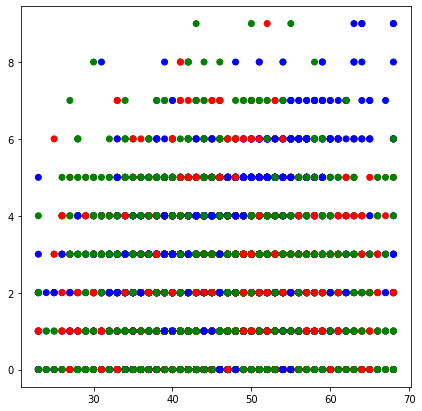

In [144]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [145]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [146]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    # расчет расстояний от классифицируемых объектов до
    # объектов обучающей выборки
    distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
    answers = []    
    for distance in distances:
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [147]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [148]:
k = 100

In [149]:
# Проверим работу алгоритма

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма (без РСА) на трейне (без добавления весов для соседей) при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (без РСА) на трейне (без добавления весов для соседей) при k = 100: 0.097
Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = 100: 0.050


### - $w(d) = \frac{1}{d+a}$,

In [150]:
def weights_n_neighbor(i, d):
    return 1 / (d + 0.1)

In [151]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма (без РСА) на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (без РСА) на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (без РСА) на трейне при k = 100: 0.624
Точность алгоритма (без РСА) на тесте при k = 100: 0.056


## C PCA

In [122]:
#Загрузка данных
df = pd.read_csv(TRAIN_DATASET_PATH)


In [123]:
df = df[feature_names + [target_name]]
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0


In [124]:
X = df[feature_names]
y = df[target_name]

In [125]:
X = np.array(X)
y = np.array(y)

In [126]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [127]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [128]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(19125.580719712467, array([-0.00997165, -0.02069133, -0.33385023, -0.67096827, -0.66058239,
       -0.02188262,  0.00463645, -0.02269323, -0.00326115, -0.02009988,
        0.00435712]))
(10587.7669813706, array([-0.12386011, -0.73872585, -0.31422863,  0.07172206,  0.09733683,
       -0.19074579,  0.0381982 ,  0.48924354, -0.06017394,  0.07928269,
       -0.19615225]))
(10286.225886715365, array([ 0.060929  ,  0.04435038,  0.03551813, -0.01277228, -0.01177828,
       -0.40925794, -0.3210068 , -0.15449173,  0.5730078 ,  0.53981797,
       -0.28037619]))
(10119.842085128475, array([-0.71913634, -0.06922581, -0.055596  ,  0.02409312,  0.0247845 ,
       -0.06114405, -0.10704784, -0.42089354, -0.40757595,  0.33164238,
        0.07287677]))
(10106.391305090812, array([ 0.21089762,  0.022714  , -0.07317381,  0.01809253,  0.02278515,
       -0.36313391,  0.58947816,  0.00085461, -0.04466946,  0.39339985,
        0.55919146]))
(999

Оценим долю дисперсии, которая описывается найденными компонентами.

In [129]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[17.386891563374988, 9.625242710336918, 9.351114442468523, 9.199856441025897, 9.187628459173474, 9.082040439517963, 8.996356651548172, 8.881582388386093, 8.719933466497496, 7.745065797113898, 1.82428764055657]
Кумулятивная доля дисперсии по компонентам 
[ 17.38689156  27.01213427  36.36324872  45.56310516  54.75073362
  63.83277406  72.82913071  81.7107131   90.43064656  98.17571236
 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [130]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(11,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.00997165 -0.12386011]
 [-0.02069133 -0.73872585]
 [-0.33385023 -0.31422863]
 [-0.67096827  0.07172206]
 [-0.66058239  0.09733683]
 [-0.02188262 -0.19074579]
 [ 0.00463645  0.0381982 ]
 [-0.02269323  0.48924354]
 [-0.00326115 -0.06017394]
 [-0.02009988  0.07928269]
 [ 0.00435712 -0.19615225]]


In [131]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)
Z

array([[-0.35613047,  1.63642391],
       [ 0.29200532, -0.75583365],
       [ 0.38652485,  1.08318976],
       ...,
       [ 0.01351244, -2.16174655],
       [ 0.12503805,  0.19889417],
       [ 0.69304299, -0.48578445]])

In [134]:
y

array([74., 57., 66., ..., 59., 72., 40.])

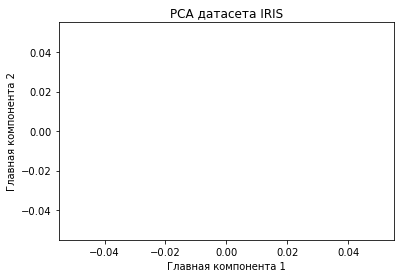

In [132]:
plt.figure()
y = y
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

Разделим выборку на обучающую и тестовую

In [133]:
X_train, X_test, y_train, y_test = train_test_split(Z, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [ ]:
# Проверим работу алгоритма

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма (c РСА) на трейне (без добавления весов для соседей) при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (c РСА) на тесте (без добавления весов для соседей) при k = {k}: {accuracy(y_pred, y_test):.3f}')

In [ ]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма (с РСА) на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (с РСА) на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

## ???

In [ ]:
test = pd.read_csv(TEST_DATASET_PATH)
test.head()

In [ ]:
final_preds = model.predict(test)

predicted_df = pd.DataFrame(final_preds, test['Id'], columns=['choose'])
predicted_df.to_csv('predicted_defaults.csv', index_label='id')

**Сохраняем полученную модель**

In [ ]:
predicted_df.to_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors_clas/EMacerszmidt_predictions_tosend.csv', index='Id')

In [ ]:
f = pd.read_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors_clas/EMacerszmidt_predictions_tosend.csv')
f.head()